# Simultana fördelningar
Simultana fördelningar är fördelningar som är beroende av varandra. Detta innebär att vi kan hantera fall där ett slumförsök är beroende av ett annat slumförsök. 

## Exempel 1
Vi har en tärning som har 6 sidor. Vi kastar tärningen 2 gånger. Vi vill nu beräkna sannolikheten att vi får en 1:a på båda kasten.

### Lösning
Vi kan använda oss av följande sannolikhetstabell:

| | 1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---|---|---|
| 1 | 1/36 | 1/18 | 1/12 | 1/9 | 5/36 | 1/6 |
| 2 | 1/18 | 1/9 | 5/36 | 1/6 | 1/6 | 5/36 |
| 3 | 1/12 | 5/36 | 1/6 | 5/36 | 1/6 | 1/9 |
| 4 | 1/9 | 1/6 | 5/36 | 1/6 | 5/36 | 1/12 |
| 5 | 5/36 | 1/6 | 1/6 | 5/36 | 1/9 | 1/18 |
| 6 | 1/6 | 5/36 | 1/9 | 1/12 | 1/18 | 1/36 |

Från tabellen ser vi att sannolikheten att få en 1:a på båda kasten:

$$ Pr(1,1) = \frac{1}{36} $$


<Figure size 1000x1000 with 0 Axes>

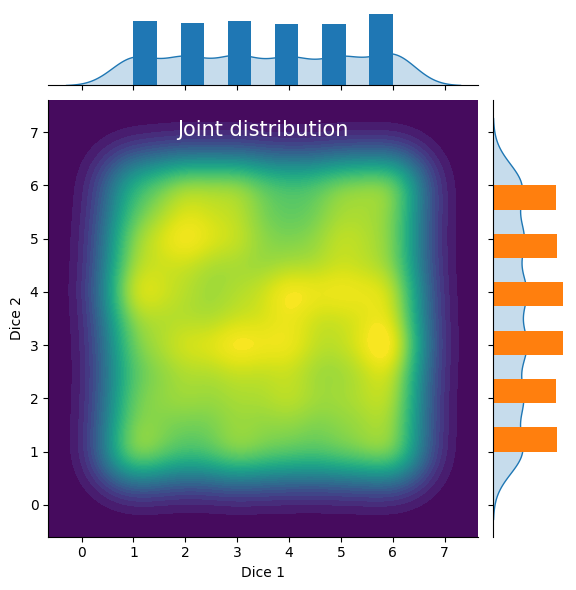

In [199]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Create a plot showing the simultaneous probability of two dice rolls and their marginal probabilities
nbr_rolls = 1000
margin1 = np.random.randint(1,7, size=nbr_rolls)    # marginal distribution for dice 1
margin2 = np.random.randint(1,7, size=nbr_rolls)    # marginal distribution for dice 2

# Create a joint distribution
joint = np.zeros((6,6))
for i in range(nbr_rolls):
    joint[margin1[i]-1,margin2[i]-1] += 1

# sns.heatmap(joint, annot=True, fmt="d")


penguins = sns.load_dataset("penguins")

# Plot joint distribution
plt.figure(figsize=(10,10))
# sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")
# sns.jointplot(data=joint, kde=False, norm_hist=True, bins=11)


df = pd.DataFrame({'x': margin1, 'y': margin2})
p = sns.jointplot(data=df, x="x", y="y", kind="kde", fill=True, thresh=0, levels=100, cmap="viridis")
p.ax_marg_x.hist(margin1, bins=11, density=True, color="C0")
p.ax_marg_y.hist(margin2, bins=11, density=True, color="C1", orientation="horizontal")

plt.title('Joint distribution', y=0.9, fontsize=15, color='white')
plt.xlabel('Dice 1')
plt.ylabel('Dice 2')
plt.show()


# Create a plot showing the simultaneous probability of two dice rolls and their marginal probabilities
nbr_rolls = 1000



## Kovarians
För att beskriva hur slumpvariabler är beroende av varandra kan vi använda oss av kovariansen. Kovariansen är en mått på hur mycket två slumpvariabler är beroende av varandra. Kovariansen är definierad som:

$$ Cov(X,Y) = E[(X-\mu_X)(Y-\mu_Y)] $$
$$ = E[XY] - E[X]E[Y] $$
$$ = \sum_{x,y}x\cdot y\cdot Pr(x,y) - \mu_X\mu_Y $$

Man kan också uttryck kovariansen som:

$$ Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})$$

Där $n$ är antalet observationer och $\bar{x}$ och $\bar{y}$ är medelvärdena för $X$ och $Y$.

### Simulera kovarians

In [218]:
# Generera korrellerade slumpvariabler
np.random.seed(0)   # Fixa seed för att få samma resultat varje gång

# Parametrar för korrelationen
mean = [0, 0]
cov = [[1, 0], [0, 1]]          # diagonal matrix, dvs oberoende variabler
# cov = [[1, 0.5], [0.5, 1]]      # Positivt korrelerade variabler
# cov = [[1, -0.5], [-0.5, 1]]    # Negativt korrelerade variabler
# cov = [[1, 1], [1, 1]]          # Perfekt korrelerade variabler

# Generera slumpvariabler
x, y = np.random.multivariate_normal(mean, cov, nbr_rolls).T
cov_df = pd.DataFrame({'x': x, 'y': y})

# Beräkna korrelationen
corr = np.corrcoef(x, y)
print('Korrelationen är: ', corr[0,1])


Korrelationen är:  -0.013925327595498789


<Figure size 1000x1000 with 0 Axes>

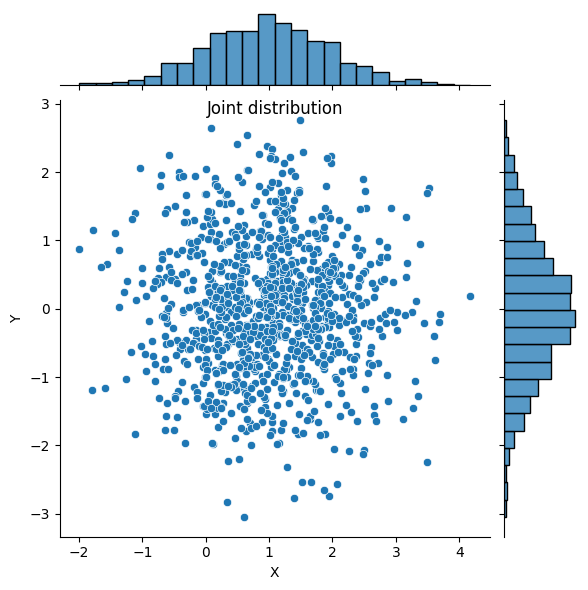

In [217]:

# Plotta slumpvariablernas fördelningar
plt.figure(figsize=(10,10))
p = sns.jointplot(data=cov_df, x="x", y="y", kind="scatter")

plt.title('Joint distribution', x=0.5, y=.95)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Exempel Iris
Om vi återkommer till iris datan för att se hur olika bladegenskaper är beroende av varandra. 



<Figure size 1000x1000 with 0 Axes>

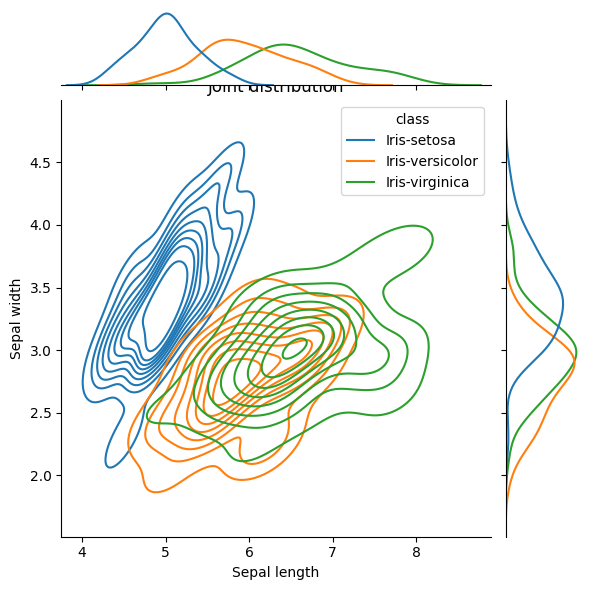

In [4]:
df_iris = pd.read_csv('../../data/iris.csv')

# Plot joint distribution
plt.figure(figsize=(10,10))
sns.jointplot(data=df_iris, x="sepallength", y="sepalwidth", kind="kde", hue="class")
plt.title('Joint distribution')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


<Figure size 1000x1000 with 0 Axes>

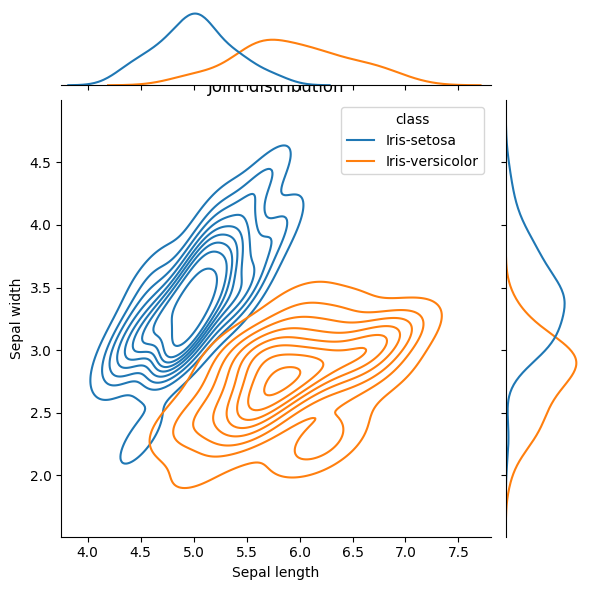

In [128]:
# Only plot Iris-setosa and Iris-versicolor
df_2_class = df_iris[df_iris['class'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Plot joint distribution
plt.figure(figsize=(10,10))
sns.jointplot(data=df_2_class, x="sepallength", y="sepalwidth", kind="kde", hue="class")
plt.title('Joint distribution')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


# Betingad sannolikhet
Betingad sannolikhet är en sannolikhet som beror på en annan sannolikhet. Detta innebär att vi kan hantera fall där ett slumförsök är beroende av ett annat slumförsök.

I iris datan så har vi 3 olika blomtyper. Vi kan nu beräkna sannolikheten att en blomma har en viss bladlängd givet att blomman är av en viss typ. Ovan såg vi att Iris-setosa och Iris-veriscolor har tydliga skillnader i sina foderblad. Låt oss nu titta på ett exempel där vi försöker beräkna sannolikheten att en blomma har en viss bladlängd givet att blomman är av typen Iris-setosa.

#### Exempel
Vi vill beräkna sannolikheten att en blomma är en Iris setosa givet att dess foderblad (sepal leaf) har en längd på högst $5$ cm (på fallet med bara två klasser).

$$Pr(\text{Klass = Iris Setosa} \ \ | \ \ \text{foderblads längd} < 5 cm) \ = \ ?$$

Vi låter $A$ vara händelsen att blomman är en Iris setosa och $B$ vara händelsen att foderbladet har en längd på högst $5$ cm. Vi kan då skriva följande:

$$Pr(A \ \ | \ \ B) = \frac{Pr(A \cap B)}{Pr(B)}$$

Vi kan nu beräkna $Pr(A \cap B)$ genom att filtrera datan på de blommor som har en foderbladslängd på högst $5$ cm. Vi får då följande:

$$Pr(A \cap B) = \frac{20}{100} = 0.2$$


In [129]:
# Given sepal length and sepal width less than 5, what is the probability of the flower being Iris-setosa?

# Calulate the probability of the flower being Iris-setosa
# P(A|B) = P(A and B) / P(B)

# P(class = Iris-setosa and sepal length < 5)
p_A_and_B = len(df_2_class[(df_iris['class'] == 'Iris-setosa') & (df_iris['sepallength'] < 5)]) / len(df_iris)
print('P(class = Iris-setosa and sepal length < 5) =', p_A_and_B)


P(class = Iris-setosa and sepal length < 5) = 0.13333333333333333




Vi kan nu beräkna $Pr(B)$ genom att filtrera datan på de blommor som har en foderbladslängd på högst $5$ cm. Vi får då följande:

$$Pr(B) = \frac{21}{100} = 0.21$$



In [130]:
# P(sepal length < 5)
p_B = len(df_2_class[df_2_class['sepallength'] < 5]) / len(df_2_class)
print('P(sepal length < 5) =', p_B)


P(sepal length < 5) = 0.21




Vi får då följande:

$$Pr(A \ \ | \ \ B) = \frac{Pr(A \cap B)}{Pr(B)} =  \frac{0.133}{0.21} = 0.635$$


In [131]:

# P(class = Iris-setosa | sepal length < 5)
p_A_given_B = p_A_and_B / p_B
print('P(class = Iris-setosa | sepal length < 5) =', p_A_given_B)


P(class = Iris-setosa | sepal length < 5) = 0.6349206349206349


# Multivariat normalfördelning
Multivariat normalfördelning är en fördelning som är beroende av varandra. Detta innebär att vi kan hantera fall där ett slumförsök är beroende av ett annat slumförsök. Vi behöver såldes känna till kovariansen mellan variablerna.

Normalfördelningen i det multivariata fallet definieras som följande:

$$f(x) = \frac{1}{\sqrt{(2\pi)^{n}|\Sigma|}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$$
där $\mu$ är en medelvärdesvektor och $\Sigma$ är kovariansmatrisen.

## Exempel
Tidigare har vi sett att Iris-setosa och Iris-veriscolor har tydliga skillnader i sina foderblad. Låt oss försöka modellera dessa skillnader med hjälp av en multivariat normalfördelning. 

För att kunna modellera dessa skillnader behöver vi först beräkna kovariansmatrisen. Vi kan göra detta genom att använda oss av följande formel:

$$\Sigma = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$


In [139]:
from scipy.stats import multivariate_normal
%matplotlib inline

# Calculate covariance matrix between sepal length and sepal width for Iris-setosa
cov_setosa = df_2_class[df_2_class['class'] == 'Iris-setosa'][['sepallength', 'sepalwidth']].cov()
print(f"Sigma = \n{cov_setosa}")


Sigma = 
             sepallength  sepalwidth
sepallength     0.124249    0.100298
sepalwidth      0.100298    0.145180


Sedan behöver vi beräkna medelvärdet för varje variabel. Vi kan göra detta genom att använda oss av följande formel för varje variabel $k$:

$$\mu_k = \frac{1}{n} \sum_{i=1}^{n} x_{k_i}$$

In [150]:
print((cov_setosa.iloc[0, 0] * cov_setosa.iloc[1, 1]))
cov_setosa.iloc[0,0]

0.018038416143273645


0.12424897959183674

In [145]:
mu_length_setosa = df_2_class[df_2_class['class'] == 'Iris-setosa']['sepallength'].mean()
mu_width_setosa = df_2_class[df_2_class['class'] == 'Iris-setosa']['sepalwidth'].mean()

print(f"Medelvärde foderbladslängd: {mu_length_setosa}")
print(f"Medelvärde foderbladsbredd: {mu_width_setosa}")

Medelvärde foderbladslängd: 5.006
Medelvärde foderbladsbredd: 3.418


Detta ger oss alla delar för att kunna ställa upp en multivariat normalfördelning:

$$
\Sigma = 
\begin{pmatrix}
\sigma_1^2 & \sigma_{1,2} \\
\sigma_{2,1} & \sigma_2^2
\end{pmatrix}
=
\begin{pmatrix}
 0.124249  &  0.100298 \\
 0.100298  &  0.145180
\end{pmatrix}
$$

$$
\mu =
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
=
\begin{pmatrix}
5.006 \\
3.418
\end{pmatrix}
$$


Vi är nu redo att ställa upp den multivariata normalfördelningen för Iris-setosa.

In [152]:
# Contour plot of multivariate normal distribution for Iris-setosa
x = np.linspace(3.5,7.5,500)
y = np.linspace(1.5,5,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv_setosa = multivariate_normal([mu_length_setosa, mu_width_setosa], cov_setosa)

Nu har vi en multivariat normalfördelning som vi kan använda för att beräkna sannolikheten att en blomma är av typen Iris-setosa baserat på dess foderbladslängd och bredd.

Låt oss se hur väl den passar till den data som vi har:

<Figure size 1000x1000 with 0 Axes>

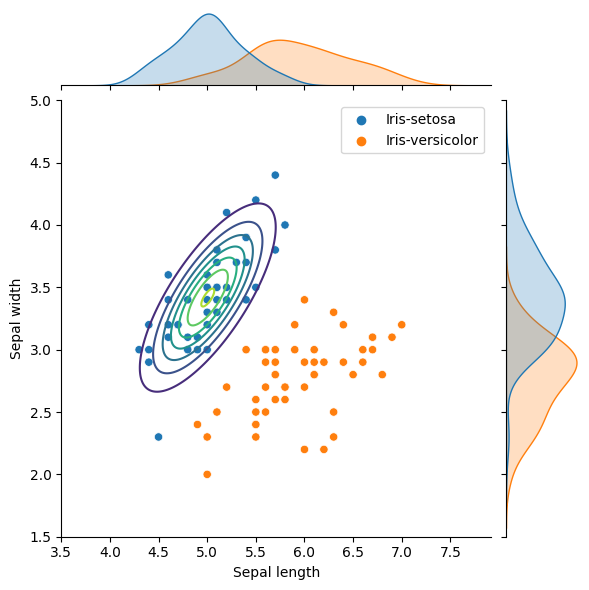

In [153]:
# Make a contour plot
plt.figure(figsize=(10,10))
sns.jointplot(data=df_2_class, x="sepallength", y="sepalwidth", kind="scatter", hue="class")
plt.contour(X, Y, rv_setosa.pdf(pos))
# plt.title('Contour plot of multivariate normal distribution for Iris-setosa')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

##### Nu gör vi samma sak för Iris-veriscolor:

             sepallength  sepalwidth
sepallength     0.266433    0.085184
sepalwidth      0.085184    0.098469


<Figure size 1000x1000 with 0 Axes>

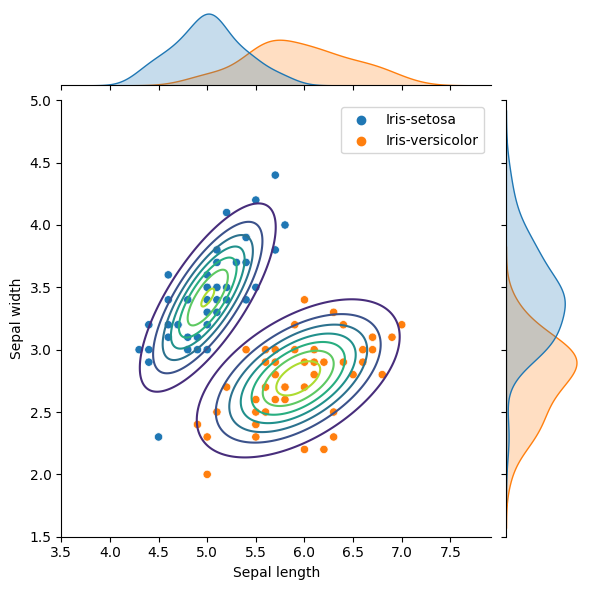

In [154]:
# Create model for Iris-versicolor
# Calculate covariance matrix between sepal length and sepal width for Iris-versicolor
cov_versicolor = df_2_class[df_2_class['class'] == 'Iris-versicolor'][['sepallength', 'sepalwidth']].cov()
print(cov_versicolor)

mu_length_versicolor = df_2_class[df_2_class['class'] == 'Iris-versicolor']['sepallength'].mean()
mu_width_versicolor = df_2_class[df_2_class['class'] == 'Iris-versicolor']['sepalwidth'].mean()

# Contour plot of multivariate normal distribution for Iris-versicolor
rv_veriscolor = multivariate_normal([mu_length_versicolor, mu_width_versicolor], cov_versicolor)

# Make a contour plot with both distributions
plt.figure(figsize=(10,10))
sns.jointplot(data=df_2_class, x="sepallength", y="sepalwidth", kind="scatter", hue="class")
plt.contour(X, Y, rv_setosa.pdf(pos))
plt.contour(X, Y, rv_veriscolor.pdf(pos))

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()


